# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [5]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np
# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

ModuleNotFoundError: No module named 'dotenv'

In [ ]:
# Read the Mapbox API key

map_box_api = 'pk.eyJ1IjoicmFoZWVsMTIzNDUiLCJhIjoiY2t1bGs1dmN0M2l5eTJ3cTY2MGF3eXlnMSJ9.0TL-7ot9LOLneEJKBG309w'
px.set_mapbox_access_token(map_box_api)

# Import Data

In [ ]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [2]:
# Define Panel Visualization Functions
# Function that return plot of ousing units per year.
def housing_units_per_year():
    """Housing Units Per Year."""
    """Housing Units Per Year."""
    

    average_House_Unitt = sfo_data["housing_units"].groupby(sfo_data.index).mean()
    figure_house_unit = plt.figure()
    plot_house_unit = average_House_Unitt.plot.bar()
    plot_house_unit.set_xlabel("Year", fontsize=12)
    plot_house_unit.set_ylabel("Housing Units", fontsize=12)
    plot_house_unit.set_title(
    "Housing Units in San Francisco from 2010 to 2016", fontsize=14, fontweight="bold"
    )
    house_unit_std = average_House_Unitt.std()
    minimum_house_unit = min(average_House_Unitt)
    maximum_house_unit = max(average_House_Unitt)

    plot_house_unit.set_ylim(
    minimum_house_unit - house_unit_std, maximum_house_unit + house_unit_std
    )
    plt.close(figure_house_unit)

    return pn.pane.Matplotlib(figure_house_unit, tight=True)



# Function that return Average Gross Rent in San Francisco Per Year plot.
def avg_gross_rent():
   
    
    average_gross_rent = (sfo_data[["sale_price_sqr_foot", "gross_rent"]].groupby(sfo_data.index).mean())    
    figure_average_gross_rent = plt.figure()
    plot_average_gross_rent = average_gross_rent["gross_rent"].plot()
    plot_average_gross_rent.set_xlabel("Year", fontsize=12)
    plot_average_gross_rent.set_ylabel("Gross Rent", fontsize=12)
    plot_average_gross_rent.set_title(
    "Average Gross Rent in San Francisco", fontsize=14, fontweight="bold"
    )
    plt.close(figure_average_gross_rent)
    
    
    
    return pn.pane.Matplotlib(figure_average_gross_rent, tight=True)


# Function that return Average Sales Price Per Year plot.
def average_sales_price():
    """Average Sales Price Per Year."""
    average_gross_rent = (sfo_data[["sale_price_sqr_foot", "gross_rent"]].groupby(sfo_data.index).mean())    
  
    figure_average_sale_price = plt.figure()
    plot_average_sale_price = average_gross_rent["sale_price_sqr_foot"].plot()
    plot_average_sale_price.set_xlabel("Year", fontsize=12)
    plot_average_sale_price.set_ylabel("Avg. Sale Price", fontsize=12)
    plot_average_sale_price.set_title(
    "Average Sale Price per Square Foot in San Francisco",
    fontsize=14,
    fontweight="bold",
    )

    plt.close(figure_average_sale_price)
    
    
    
    return pn.pane.Matplotlib(figure_average_sale_price, tight=True)


# Function that return Average Prices by Neighborhood plot.
def average_price_by_neighborhood():
    
    
    year_and_neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
    year_and_neighborhood.reset_index(inplace=True)
    year_and_neighborhood.rename(columns={"level_0": "year"}, inplace=True)
    year_and_neighborhood.head(10)
    
    year_and_neighborhood_plot =year_and_neighborhood.hvplot.line(
        "year",
        "sale_price_sqr_foot",
        xlabel= "Year",
        ylabel= "Avg. Sale Price per Square Foot",
        groupby= "neighborhood")
    return year_and_neighborhood_plot


# Function that return Top 10 Most Expensive Neighborhoods plot using hyplot.
def most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    most_expensive = sfo_data.groupby(by="neighborhood").mean()
    most_expensive= most_expensive.sort_values(
    by="sale_price_sqr_foot", ascending=False).head(10)
    most_expensive = most_expensive.reset_index()
    
    
    most_expensive_hvplot =most_expensive.hvplot.bar(
        "neighborhood",
        "sale_price_sqr_foot",
        title="Top 10 Expensive Neighborhoods in SFO",
        xlabel="Neighborhood",
        ylabel="Avg. Sale Price per Square Foot",
        height=400,
        rot=90
    )
    return most_expensive_hvplot

# Function that return the plot of Comparison of Rent and Sales Prices of Most Expensive Neighborhoods.
def most_expensive_neighborhoods_rent_sales():
    
    
    # CODE HERE
    dataframe_expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    dataframe_expensive_neighborhoods = dataframe_expensive_neighborhoods.sort_values(
        by="sale_price_sqr_foot", ascending=False
    ).head(10)
    dataframe_expensive_neighborhoods = dataframe_expensive_neighborhoods.reset_index()
    return dataframe_expensive_neighborhoods.hvplot.bar(
        "neighborhood",
        "sale_price_sqr_foot",
        title="Top 10 Expensive Neighborhoods in SFO",
        xlabel="Neighborhood",
        ylabel="Avg. Sale Price per Square Foot",
        height=400,
        rot=90
    )

    
# Function that return Parallel Coordinates Plot.
def parallel_coordinates():
    

    most_expensive = sfo_data.groupby(by="neighborhood").mean()
    most_expensive= most_expensive.sort_values(
    by="sale_price_sqr_foot", ascending=False).head(10)
    most_expensive = most_expensive.reset_index()
    
    parallel_coordinates = px.parallel_coordinates(
        most_expensive,
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
    )
    return parallel_coordinates


# Function that return Parallel Categories Plot.
def parallel_categories():
    
    
    most_expensive = sfo_data.groupby(by="neighborhood").mean()
    most_expensive= most_expensive.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    most_expensive = most_expensive.reset_index()
    
    parallel_categories = px.parallel_categories(most_expensive,
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
    )
    return parallel_categories


# Function that return Neighborhood Map.
def neighborhood_map():

    
    
    neighborhoods_df= sfo_data.groupby(by="neighborhood").mean()
    neighborhoods_df.reset_index(inplace=True)
    neighborhoods_df.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
    neighborhoods_df
    
    
    all_neighborhoods_df=pd.concat([df_neighborhood_locations,
                                neighborhoods_df['sale_price_sqr_foot'],
                                neighborhoods_df['housing_units'],
                                neighborhoods_df['gross_rent']
                               ], axis=1)
 
    
    px.set_mapbox_access_token(map_box_api)
    map = px.scatter_mapbox(
        all_neighborhoods_df,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=15,
        zoom=11,
        hover_name="Neighborhood",
        title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
    )
  
    plotly_panel = pn.pane.Plotly(map)
    plotly_panel._updates = True
    return plotly_panel

# Function that return Sunburst Plot.
def sunburst():
   
    dataframe_costs = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    dataframe_costs.reset_index(inplace=True)
    dataframe_costs.rename(columns={"level_0": "year"}, inplace=True)
    dataframe_all_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    dataframe_all_neighborhoods.reset_index(inplace=True)
    dataframe_all_neighborhoods.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
    dataframe_expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    dataframe_expensive_neighborhoods = dataframe_expensive_neighborhoods.sort_values(
    by="sale_price_sqr_foot", ascending=False).head(10)
    dataframe_expensive_neighborhoods = dataframe_expensive_neighborhoods.reset_index()
    dataframe_expensive_neighborhoods_per_year = dataframe_costs[dataframe_costs["neighborhood"].isin(dataframe_expensive_neighborhoods["neighborhood"])]
    fig = px.sunburst(dataframe_expensive_neighborhoods_per_year, path=[dataframe_expensive_neighborhoods_per_year["year"], dataframe_expensive_neighborhoods_per_year["neighborhood"]], values=dataframe_expensive_neighborhoods_per_year['gross_rent'],
                  color=dataframe_expensive_neighborhoods_per_year['gross_rent'], 
                 
                  color_continuous_midpoint=np.average(dataframe_expensive_neighborhoods_per_year['gross_rent'], weights=dataframe_expensive_neighborhoods_per_year['gross_rent']))
    fig.show()
    
    # YOUR CODE HERE!


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [3]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
title = pn.pane.Markdown(
    """
# Real Estate Analysis of San Francisco from 2010 to 2016
""",
    width=800,
)
welcome = pn.pane.Markdown(
  
)


# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, neighborhood_map())),
    ("Yearly Market Analysis", pn.Row(housing_units_per_year(), avg_gross_rent(), average_sales_price())),
    ("Neighborhood Analysis", pn.Column(average_price_by_neighborhood(), most_expensive_neighborhoods())),
    (
        "Parallel Plots Analysis",
        pn.Column(parallel_coordinates(), parallel_categories(), width=960),
    ),
)


# Create the dashboard

# YOUR CODE HERE!

NameError: name 'sfo_data' is not defined

## Serve the Panel Dashboard

In [4]:
# Serve the# dashboard
# YOUR CODE HERE!
tabs.servable()

NameError: name 'tabs' is not defined

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [114]:
housing_units_per_year()

BokehModel(combine_events=True, render_bundle={'docs_json': {'7e43198f-36b5-425b-ade7-8483e3e30db6': {'defs': …

Matplotlib(Figure, tight=True)

In [115]:
avg_gross_rent()

BokehModel(combine_events=True, render_bundle={'docs_json': {'7a8bfb8a-7311-46f6-a950-e3a91e3809fb': {'defs': …

Matplotlib(Figure, tight=True)

In [116]:
average_sales_price()

BokehModel(combine_events=True, render_bundle={'docs_json': {'06efa778-9d36-4d1f-ab4b-caf298ace460': {'defs': …

Matplotlib(Figure, tight=True)

In [117]:
average_price_by_neighborhood()

BokehModel(combine_events=True, render_bundle={'docs_json': {'725370f1-8c55-4f01-8580-78f6bc6aef77': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [118]:
most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [119]:
most_expensive_neighborhoods_rent_sales()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [120]:
neighborhood_map().show()

Launching server at http://localhost:57990


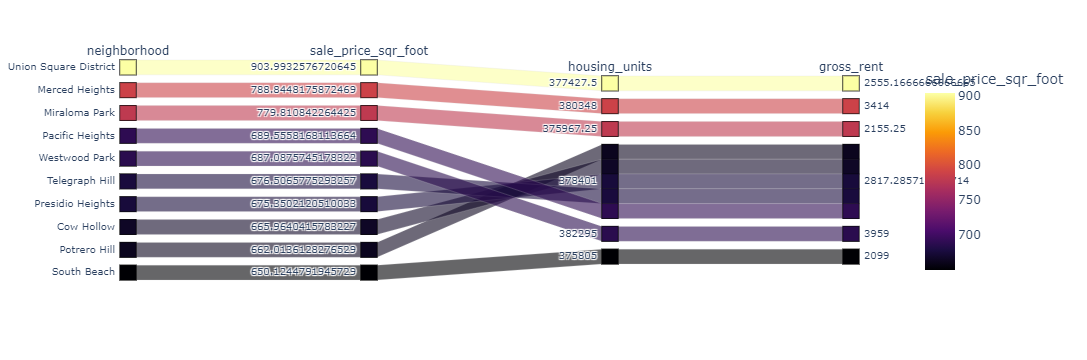

In [121]:
parallel_categories()

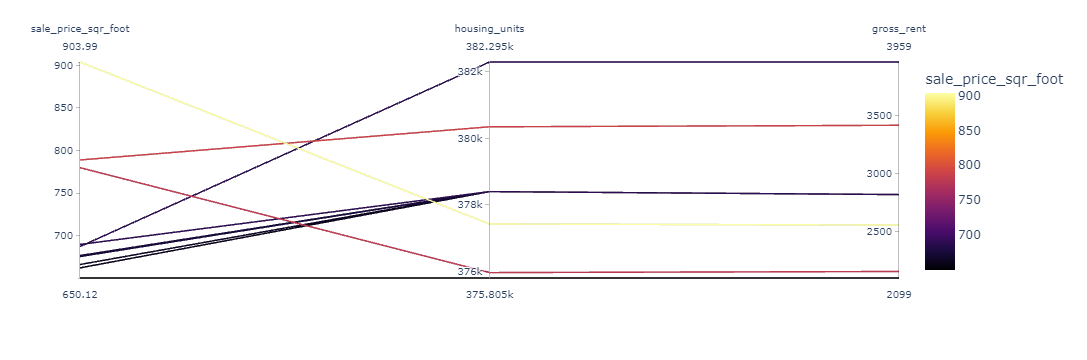

In [122]:
parallel_coordinates()

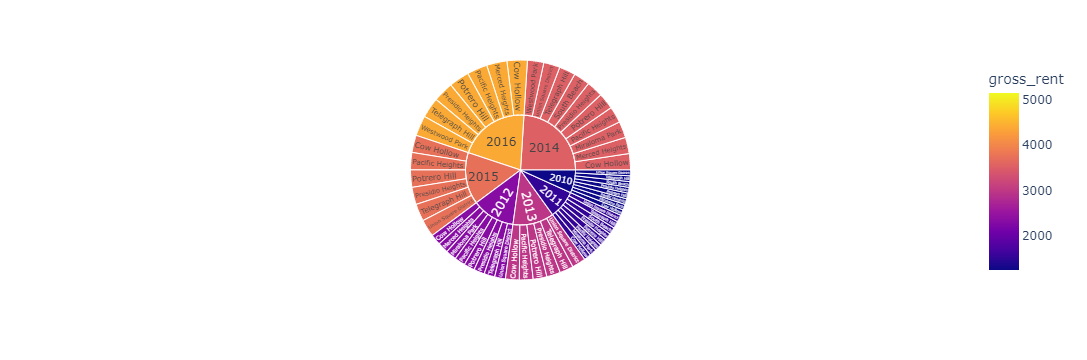

In [123]:
sunburst()